In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms




Files already downloaded and verified
Files already downloaded and verified


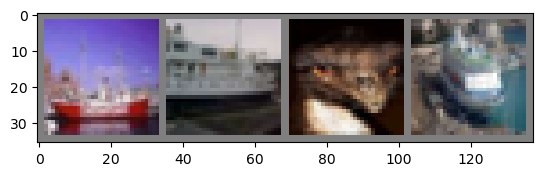

ship  ship  bird  ship 


In [3]:

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
images.shape[1:]

torch.Size([3, 32, 32])

In [5]:


# Device configuration
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"{device=}")
class SimpleImageClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleImageClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.LazyLinear( 120)
        self.fc2 = nn.LazyLinear( 84)
        self.fc3 = nn.LazyLinear(10)


    def forward(self, x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=torch.flatten(x,1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net = SimpleImageClassifier()
# net.to(device)

device=device(type='mps')


In [6]:
SimpleImageClassifier().forward(images)

tensor([[-0.0929, -0.0057, -0.0389,  0.0332, -0.0151, -0.0620,  0.0242,  0.0160,
          0.0135, -0.0224],
        [-0.0855, -0.0075, -0.0282,  0.0269, -0.0244, -0.0495,  0.0284,  0.0216,
          0.0136, -0.0330],
        [-0.0829, -0.0055, -0.0414,  0.0406, -0.0100, -0.0456,  0.0209,  0.0253,
          0.0094, -0.0355],
        [-0.0818, -0.0050, -0.0444,  0.0360, -0.0224, -0.0443,  0.0281,  0.0255,
          0.0192, -0.0203]], grad_fn=<AddmmBackward0>)

In [7]:
rangomImage= torch.rand(1,3,32,32)

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(10):
    print(f"{epoch=}")
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

epoch=0
[1,  2000] loss: 0.721
[1,  4000] loss: 0.752
[1,  6000] loss: 0.787
[1,  8000] loss: 0.805
[1, 10000] loss: 0.837
[1, 12000] loss: 0.831
epoch=1
[2,  2000] loss: 0.716
[2,  4000] loss: 0.718
[2,  6000] loss: 0.743
[2,  8000] loss: 0.776
[2, 10000] loss: 0.811
[2, 12000] loss: 0.814
epoch=2
[3,  2000] loss: 0.691
[3,  4000] loss: 0.715
[3,  6000] loss: 0.749
[3,  8000] loss: 0.728
[3, 10000] loss: 0.753
[3, 12000] loss: 0.802
epoch=3
[4,  2000] loss: 0.667
[4,  4000] loss: 0.686
[4,  6000] loss: 0.716
[4,  8000] loss: 0.740
[4, 10000] loss: 0.747
[4, 12000] loss: 0.775
epoch=4
[5,  2000] loss: 0.628
[5,  4000] loss: 0.678
[5,  6000] loss: 0.714
[5,  8000] loss: 0.718
[5, 10000] loss: 0.738
[5, 12000] loss: 0.750
epoch=5
[6,  2000] loss: 0.619
[6,  4000] loss: 0.646
[6,  6000] loss: 0.695
[6,  8000] loss: 0.700
[6, 10000] loss: 0.744
[6, 12000] loss: 0.738
epoch=6
[7,  2000] loss: 0.612
[7,  4000] loss: 0.641
[7,  6000] loss: 0.662
[7,  8000] loss: 0.689
[7, 10000] loss: 0.737
[

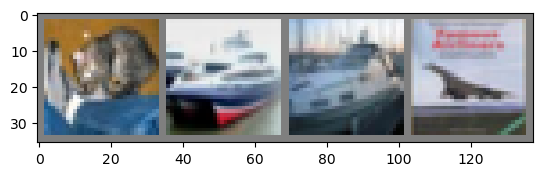

GroundTruth:  cat   ship  ship  plane


In [11]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))